# Machine Learning Pipeline - Model Training (Henry's Comments)

In this notebook, we pick up the transformed datasets and the selected variables that we saved in the previous notebooks.

# Reproducibility: Setting the seed

With the aim to ensure reproducibility between runs of the same notebook, but also between the research and production environment, for each step that includes some element of randomness, it is extremely important that we **set the seed**.

In [36]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to save the model
import joblib

# to build the model
from sklearn.linear_model import Lasso

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Import data
- load the train and test set with engineered features ("processed data")

In [37]:
X_train = pd.read_csv('../data/xtrain_processed.csv')
X_test = pd.read_csv('../data/xtest_processed.csv')

In [38]:
X_train.iloc[:5,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.750000,0.75,0.461171,0.0,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,0.666667,1.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.0,0.75,0.018692,1.0,0.75,0.430183,0.5,0.5,1.0,0.116686,0.032907,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.456066,0.0,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,0.5,0.5,0.333333,0.666667,0.000000,0.8,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.0,0.75,0.457944,0.5,0.25,0.220028,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.666667,0.75,0.0,0.0,0.0
2,0.916667,0.75,0.394699,0.0,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,0.5,1.0,1.000000,0.666667,0.000000,1.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.75,0.046729,0.5,0.50,0.406206,0.5,0.5,1.0,0.228705,0.149909,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.090909,0.666667,0.75,0.0,0.0,0.0
3,0.750000,0.75,0.445002,0.0,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,1.000000,1.0,0.255670,0.0,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.75,0.084112,0.5,0.50,0.362482,0.5,0.5,1.0,0.469078,0.045704,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.636364,0.666667,0.75,1.0,0.0,0.0
4,0.750000,0.75,0.577658,0.0,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,0.5,0.5,0.333333,0.666667,0.000000,0.6,0.086818,0.0,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.75,0.411215,0.5,0.50,0.406206,0.5,0.5,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0


In [39]:
y_train = pd.read_csv('../data/ytrain_processed.csv')
y_test = pd.read_csv('../data/ytest_processed.csv')

In [40]:
y_train.iloc[:5,:]

,SalePrice
0,12.211060
1,11.887931
2,12.675764
3,12.278393
4,12.103486


## Selected features
- In the previous notebook, we performed feature selection using LASSO regression. We choose features with coefficents > threshold of 0 (essentially, coefficients that were not shrinked to zero).
- We saved the names of the selected features as csv, we will now load those selected features

In [41]:
features = pd.read_csv('../outputs/selected_features.csv')
features.head()

,0
0,MSSubClass
1,MSZoning
2,LotFrontage
3,LotShape
4,LandContour


In [42]:
features=features['0'].to_list()
print(features)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch', 'SaleCondition']


In [43]:
# We will only use the selected features in the train and test set
X_train = X_train[features]
X_test = X_test[features]

## Train model with X_train and X_test
- Use LASSO regression model
- Set alpha to 0.001 (no hyperparameter tuning)
- Set seed to make pipeline reproducible

In [44]:
# init the model
reg=Lasso(alpha=0.001, # set by user (no tuning)
          random_state=0) # set seed as Lasso regression as random element

# fit the model
reg.fit(X_train,y_train)

Lasso(alpha=0.001, random_state=0)

## Evaluate model performance
- We log transformed the SalePrice (response variable)
- To evaluate the model performance and predictions, we can first transform both the prediction and y_train back to the original SalePrices
- Evaluate the model performance with: 
    - train_MSE =$\frac{(y_i-\hat{y_i})^2}{n-k}$ 
    - train_RMSE(aka SER)= $\sqrt{\frac{(y_i-\hat{y_i})^2}{n-k}}$
    - $R^2$
    
- Typecasting in Python:
    - https://www.stackoftuts.com/python-3/typecasting-in-python/

### Estimate the train mse, rmse, and r2 using the train dataset

In [45]:
# Make predictions with fitted estimator
pred = reg.predict(X_train)

In [46]:
# Compte mse, rmse, and r2

# convert pred and ytrain back to original SalePrice values
# use int to quickly cast a float to int
print(f'The trained MSE is: {int(mean_squared_error(np.exp(y_train),np.exp(pred)))}')

The trained MSE is: 781396538


In [47]:
print(f'The trained RMSE is: {int(mean_squared_error(np.exp(y_train),np.exp(pred),squared=False))}')

The trained RMSE is: 27953


In [48]:
print(f'The trained R2 is: {r2_score(np.exp(y_train),np.exp(pred))}')

The trained R2 is: 0.8748530463468015


- The typical gap between datapoints and regression line is \$27953
- 95\% of the predictions will fall within +/- 27953*2 = \$55906 of the observed SalePrice

### Estimate the test mse, rmse, and r2 using the test (validation) dataset

In [49]:
# make predictions for "unknown/new" observations in the test set
pred = reg.predict(X_test)

In [50]:
# test MSE
print(f'The test MSE is: {int(mean_squared_error(np.exp(y_test),np.exp(pred)))}')

The test MSE is: 1060767982


In [51]:
print(f'The test RMSE is: {int(mean_squared_error(np.exp(y_test),np.exp(pred),squared=False))}')

The test RMSE is: 32569


In [52]:
print(f'The test R2 is: {r2_score(np.exp(y_test),np.exp(pred))}')

The test R2 is: 0.8456417073258413


In [53]:
print('Average house price: ', int(np.exp(y_train).median()))

Average house price:  163000


## Examine graphically how well the model predicts the SalePrice of new/unknown observations
- Plot True house prices in the test set with the predicted house prices (from features) in the test set
- Scatter plot of Predicted SalePrice vs True House Price
- If predictions matches True house price, I expect a linear trend in the scatterplot

Text(0.5, 1.0, 'Evaluation of predictions from the Lasso regression model')

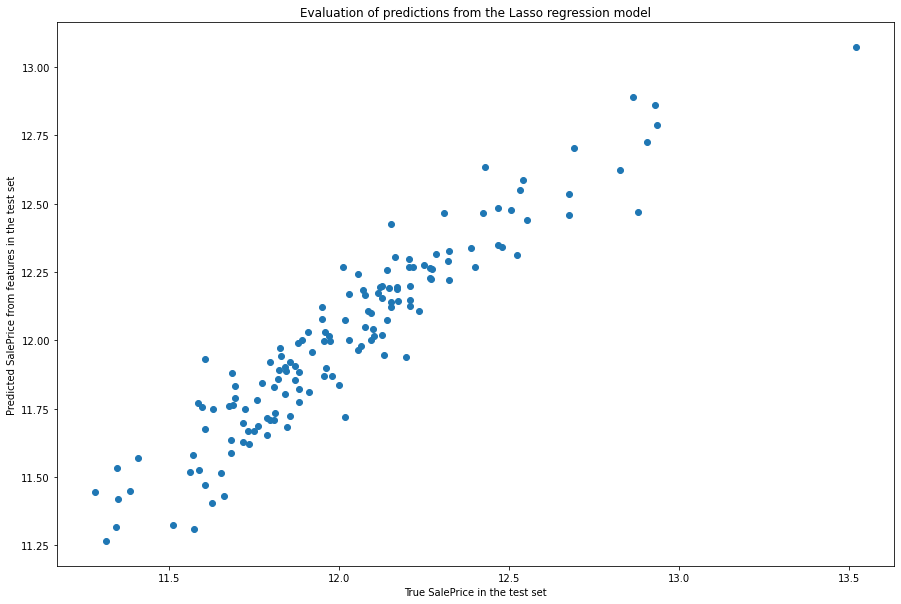

In [54]:
plt.figure(figsize=(15,10))
plt.scatter(x=y_test, y=reg.predict(X_test))
plt.xlabel('True SalePrice in the test set')
plt.ylabel('Predicted SalePrice from features in the test set')
plt.title('Evaluation of predictions from the Lasso regression model')

We can see that our model is doing a pretty good job at estimating house prices. The data points follow a linear trend.

## Let's look at the distribution of residuals and see if they are normal
- We need this assumption if our train dataset has small sample size (so estimated beta won't be normal)

In [55]:
# make predictions for "unknown/new" observations in the test set
pred = reg.predict(X_test)

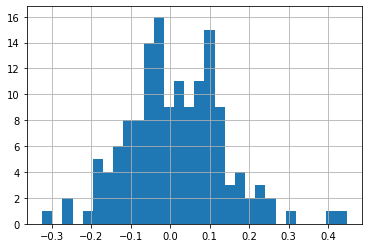

In [56]:
residuals = y_test['SalePrice'] - pred
residuals.hist(bins=30)
plt.show()

The distribution of the residuals is approximately normal.

## Feature importance
- Assessed using the absolute value of the estimated regression coefficent

In [57]:
array = np.arange(15).reshape(3, 5)
print("Original array : \n", array)
 
# Output comes like [ 0  1  2 ..., 12 13 14]
# as it is a long output, so it is the way of
# showing output in Python
print("\nravel() : ", array.ravel())

Original array : 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

ravel() :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [58]:
importance = pd.Series(np.abs(reg.coef_.ravel())) # .ravel() might not be needed in newer versions of np

In [59]:
importance

0     0.039626
1     0.105246
2     0.004909
3     0.020319
4     0.008865
5     0.024437
6     0.249232
7     0.469451
8     0.287491
9     0.019917
10    0.014472
11    0.022164
12    0.019025
13    0.031249
14    0.075601
15    0.053385
16    0.058698
17    0.042666
18    0.066462
19    0.383279
20    0.028410
21    0.823885
22    0.096785
23    0.035410
24    0.082419
25    0.046684
26    0.064043
27    0.018651
28    0.054554
29    0.012895
30    0.187288
31    0.006281
32    0.016452
33    0.043270
34    0.035015
35    0.125989
dtype: float64

In [60]:
importance.index = features

In [61]:
importance

MSSubClass       0.039626
MSZoning         0.105246
LotFrontage      0.004909
LotShape         0.020319
LandContour      0.008865
LotConfig        0.024437
Neighborhood     0.249232
OverallQual      0.469451
OverallCond      0.287491
YearRemodAdd     0.019917
RoofStyle        0.014472
Exterior1st      0.022164
ExterQual        0.019025
Foundation       0.031249
BsmtQual         0.075601
BsmtExposure     0.053385
BsmtFinType1     0.058698
HeatingQC        0.042666
CentralAir       0.066462
1stFlrSF         0.383279
2ndFlrSF         0.028410
GrLivArea        0.823885
BsmtFullBath     0.096785
HalfBath         0.035410
KitchenQual      0.082419
TotRmsAbvGrd     0.046684
Functional       0.064043
Fireplaces       0.018651
FireplaceQu      0.054554
GarageFinish     0.012895
GarageCars       0.187288
GarageArea       0.006281
PavedDrive       0.016452
WoodDeckSF       0.043270
ScreenPorch      0.035015
SaleCondition    0.125989
dtype: float64

In [62]:
importance.sort_values(inplace=True, ascending=False)

Text(0.5, 1.0, 'Feature Importance')

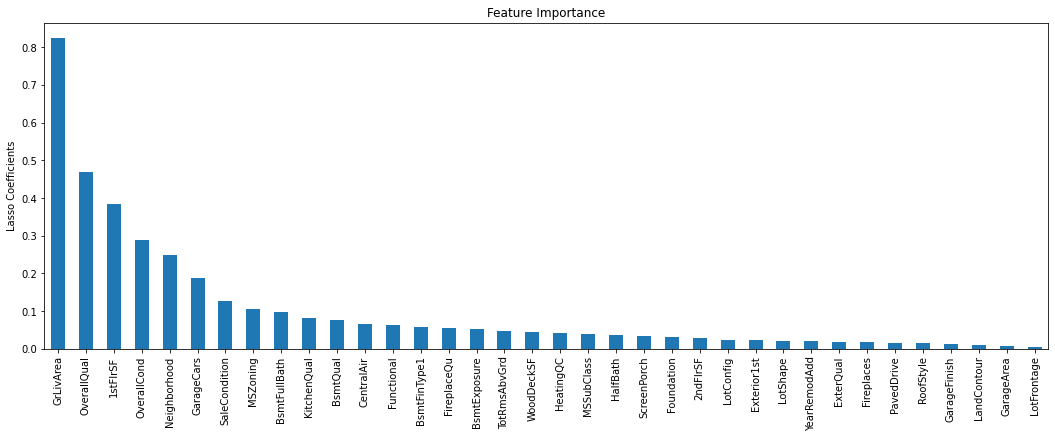

In [63]:
# Visualize with bar plot
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

## Save the model using joblib 
- Persist the model

In [64]:
joblib.dump(reg, '../models/linear_regression.joblib')

['../models/linear_regression.joblib']

# Additional Resources


## Feature Engineering

- [Feature Engineering for Machine Learning](https://www.udemy.com/course/feature-engineering-for-machine-learning/?referralCode=A855148E05283015CF06) - Online Course
- [Packt Feature Engineering Cookbook](https://www.packtpub.com/data/python-feature-engineering-cookbook) - Book
- [Feature Engineering for Machine Learning: A comprehensive Overview](https://trainindata.medium.com/feature-engineering-for-machine-learning-a-comprehensive-overview-a7ad04c896f8) - Article
- [Practical Code Implementations of Feature Engineering for Machine Learning with Python](https://towardsdatascience.com/practical-code-implementations-of-feature-engineering-for-machine-learning-with-python-f13b953d4bcd) - Article

## Feature Selection

- [Feature Selection for Machine Learning](https://www.udemy.com/course/feature-selection-for-machine-learning/?referralCode=186501DF5D93F48C4F71) - Online Course
- [Feature Selection for Machine Learning: A comprehensive Overview](https://trainindata.medium.com/feature-selection-for-machine-learning-a-comprehensive-overview-bd571db5dd2d) - Article

## Machine Learning

- [Best Resources to Learn Machine Learning](https://trainindata.medium.com/find-out-the-best-resources-to-learn-machine-learning-cd560beec2b7) - Article
- [Machine Learning with Imbalanced Data](https://www.udemy.com/course/machine-learning-with-imbalanced-data/?referralCode=F30537642DA57D19ED83) - Online Course